<a href="https://colab.research.google.com/github/DaniChinwendu/skin-sensitization-prediction/blob/main/Rdkit_FP_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
OPTIMIZING SKIN SENSITIZATION PREDICTION: A COMPARATIVE ANALYSIS OF KNN VS RANDOM FOREST

RDKit Fingerprint Bit Visualization - Google Colab Notebook
OPTIMIZING SKIN SENSITIZATION PREDICTION: A COMPARATIVE ANALYSIS OF KNN VS RANDOM FOREST

Daniel C. Ukaegbu 1, Karolina Kopanska 1, Peter Ranslow 2, Thomas Hartung 1, Alexandra Maertens 1*
1 Center for Alternatives to Animal Testing (CAAT), Johns Hopkins Bloomberg School of Public Health, Baltimore, Maryland 21205, United States
2 Consortium for Environmental Risk Management (CERM), Hallowell, Maine 04347, United States
*Correspondence:
Alexandra Maertens
amaerte1@jhu.edu


Generates Morgan and AtomPair fingerprints and visualizes key bits.
Saves PNG images of highlighted substructures for each active bit.
"""

'\nOPTIMIZING SKIN SENSITIZATION PREDICTION: A COMPARATIVE ANALYSIS OF KNN VS RANDOM FOREST\n\nRDKit Fingerprint Bit Visualization - Google Colab Notebook\n\nAuthors:\nDaniel C. Ukaegbu, ………, ………, Thomas Hartung, Alexandra Maertens\n\nAffiliation:\nCenter for Alternatives to Animal Testing (CAAT),\nJohns Hopkins Bloomberg School of Public Health,\nBaltimore, Maryland 21205, United States\n\nCorrespondence:\nAlexandra Maertens\nEmail: amaerte1@jhu.edu\n\nGenerates Morgan and AtomPair fingerprints and visualizes key bits.\nSaves PNG images of highlighted substructures for each active bit.\n'

In [ ]:
# ============================================================================
# SECTION 1: Install Dependencies (Run this first in Colab)
# ============================================================================
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 50.4 MB/s eta 0:00:00


In [ ]:
# ============================================================================
# SECTION 2: Import Depedencies and View Visualizable Fingeprint Bits
# ============================================================================

import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

def get_visualizable_bits(smiles):
    """
    Get visualizable bits for Morgan and Atom Pair fingerprints from a SMILES string.

    Args:
        smiles (str): SMILES string of the molecule

    Returns:
        dict: Dictionary with 'morgan_bits' and 'atom_pair_bits' lists
    """
    # Parse SMILES
    mol = Chem.MolFromSmiles(smiles)

    if mol is None:
        print(f"Error: Invalid SMILES string '{smiles}'")
        return None

    results = {}

    # --- Morgan Fingerprint ---
    gen = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=512)
    ao = rdFingerprintGenerator.AdditionalOutput()
    ao.AllocateBitInfoMap()

    fp = gen.GetFingerprint(mol, additionalOutput=ao)
    bitinfo = ao.GetBitInfoMap()

    visualizable_bits = [bit for bit in fp.GetOnBits() if bit in bitinfo]
    results['morgan_bits'] = visualizable_bits

    # --- Atom Pair Fingerprint ---
    gen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=512)
    ao = rdFingerprintGenerator.AdditionalOutput()
    ao.AllocateBitInfoMap()

    fp = gen.GetFingerprint(mol, additionalOutput=ao)
    bitinfo = ao.GetBitInfoMap()

    visualizable_bits = [bit for bit in fp.GetOnBits() if bit in bitinfo]
    results['atom_pair_bits'] = visualizable_bits

    return results



In [ ]:
# ============================================================================
# SECTION 3: Input Smiles
# ============================================================================
# --- Example usage ---
# See all Visuliazable bits
smiles = 'CCOCCl'
bits = get_visualizable_bits(smiles)

if bits:
    print(f"SMILES: {smiles}")
    print(f"\nMorgan Fingerprint - Visualizable bits ({len(bits['morgan_bits'])} total):")
    print(bits['morgan_bits'])

    print(f"\nAtom Pair Fingerprint - Visualizable bits ({len(bits['atom_pair_bits'])} total):")
    print(bits['atom_pair_bits'])

# Test with multiple SMILES
print("\n" + "="*60 + "\n")

test_smiles = ['CCO', 'c1ccccc1', 'CC(=O)O', 'CCOCCl']
for smi in test_smiles:
    bits = get_visualizable_bits(smi)
    if bits:
        print(f"SMILES: {smi}")
        print(f"  Morgan bits: {len(bits['morgan_bits'])} visualizable")
        print(f"  Atom Pair bits: {len(bits['atom_pair_bits'])} visualizable")

SMILES: CCOCCl

Morgan Fingerprint - Visualizable bits (12 total):
[33, 80, 85, 147, 165, 183, 214, 277, 294, 380, 456, 472]

Atom Pair Fingerprint - Visualizable bits (10 total):
[56, 57, 60, 104, 244, 372, 376, 380, 436, 444]


SMILES: CCO
  Morgan bits: 6 visualizable
  Atom Pair bits: 3 visualizable
SMILES: c1ccccc1
  Morgan bits: 4 visualizable
  Atom Pair bits: 8 visualizable
SMILES: CC(=O)O
  Morgan bits: 7 visualizable
  Atom Pair bits: 6 visualizable
SMILES: CCOCCl
  Morgan bits: 12 visualizable
  Atom Pair bits: 10 visualizable


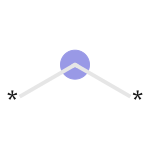

In [ ]:
# ============================================================================
# SECTION 4: View Fingerprint Bits (MorganFP)
# ============================================================================
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw


# --- Example molecule ---
mol = Chem.MolFromSmiles('CCOCCl')

# --- Generate RDKit MorganFP Fingerprint with Bit Info ---
gen = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=512)
ao = rdFingerprintGenerator.AdditionalOutput()
ao.AllocateBitInfoMap()

# Generate fingerprint and extract bitInfo
fp = gen.GetFingerprint(mol, additionalOutput=ao)
bitinfo = ao.GetBitInfoMap()

# Get visualizable bits
visualizable_bits = [bit for bit in fp.GetOnBits() if bit in bitinfo]
Draw.DrawMorganBit(mol, 80, bitinfo)




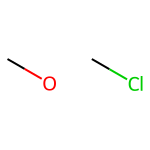

In [ ]:
# ============================================================================
# SECTION 4: View Fingerprint Bits (ATOM PAIR)
# ============================================================================
# --- Generate RDKit RDKIT ATOM PAIR  Fingerprint with Bit Info ---
# Setup ATOMPAIR  generator with bitInfo
gen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=512)
ao = rdFingerprintGenerator.AdditionalOutput()
ao.AllocateBitInfoMap()

# Generate fingerprint and extract bitInfo
fp = gen.GetFingerprint(mol, additionalOutput=ao)
bitinfo = ao.GetBitInfoMap()

# Get visualizable bits
visualizable_bits = [bit for bit in fp.GetOnBits() if bit in bitinfo]
visualizable_bits
Draw.DrawRDKitBit(mol,60,bitinfo)
